---
title: LAB 3
author: Marvin (Wenxiang) Li
format:
    html:
        toc: true
        code-fold: true
embed-resources: true
---

#### 0. Loading

In [1]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "income_evaluation.csv"

# Load the latest version
income_evaluation = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "lodetomasi1995/income-classification",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

income_evaluation.head()

/var/folders/m1/tx6ck0f962jd1hq4ch5phg_80000gn/T/ipykernel_89848/4064584859.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  income_evaluation = kagglehub.load_dataset(


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [2]:
print(income_evaluation.columns)

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')


In [3]:
income_evaluation_clean = income_evaluation.dropna()
income_evaluation_clean.columns = income_evaluation_clean.columns.str.strip() 

In [4]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    f1_score, make_scorer,
    confusion_matrix, ConfusionMatrixDisplay,
    classification_report, precision_score, recall_score
)

#### 1. Bernoulli Naive Bayes

In [5]:
columns_to_keep_nb = [
    'age',
    'workclass',
    'education',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'income'
]
income_evaluation_nb = income_evaluation_clean[columns_to_keep_nb]# direclt call columns 
income_evaluation_nb.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
continuous_features = [
    'age',
    'capital-gain',
    'capital-loss',
    'hours-per-week'
]
discretizer = KBinsDiscretizer(
    n_bins=5,
    encode='onehot-dense',
    strategy='uniform',
    subsample=None
)
X_binned_nb = discretizer.fit_transform(
    income_evaluation_nb[continuous_features]
)

In [7]:
categorical_features_nb = income_evaluation_nb.drop(columns = continuous_features + ['income'])
X_categorical_nb = pd.get_dummies(categorical_features_nb, drop_first=True)

In [8]:
X_nb = np.hstack((X_binned_nb, X_categorical_nb.values))
label_encoder = LabelEncoder()
y_encoded_nb = label_encoder.fit_transform(income_evaluation_nb['income'])

In [32]:
label_encoder.classes_

array([' <=50K', ' >50K'], dtype=object)

In [9]:
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X_nb, y_encoded_nb, test_size=0.2, random_state=42)

Best Params: {'alpha': 0.1}
Best F1 (Macro): 0.7336025538619022
Threshold Evaluation Results:
   threshold  precision    recall        f1
0        0.3   0.478423  0.896244  0.623837
1        0.4   0.493911  0.877785  0.632134
2        0.5   0.514242  0.861871  0.644148
3        0.6   0.533441  0.842775  0.653343
4        0.7   0.561833  0.803947  0.661430
5        0.8   0.596421  0.763845  0.669830
6        0.9   0.643161  0.673456  0.657960
Best Threshold: 0.8000000000000003
Precision: 0.596, Recall: 0.764, F1: 0.670
Final Classification Report (Best Threshold):
              precision    recall  f1-score   support

           0       0.92      0.84      0.87      4942
           1       0.60      0.76      0.67      1571

    accuracy                           0.82      6513
   macro avg       0.76      0.80      0.77      6513
weighted avg       0.84      0.82      0.83      6513



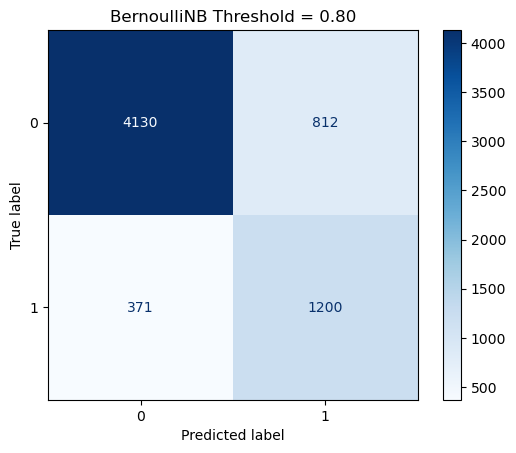

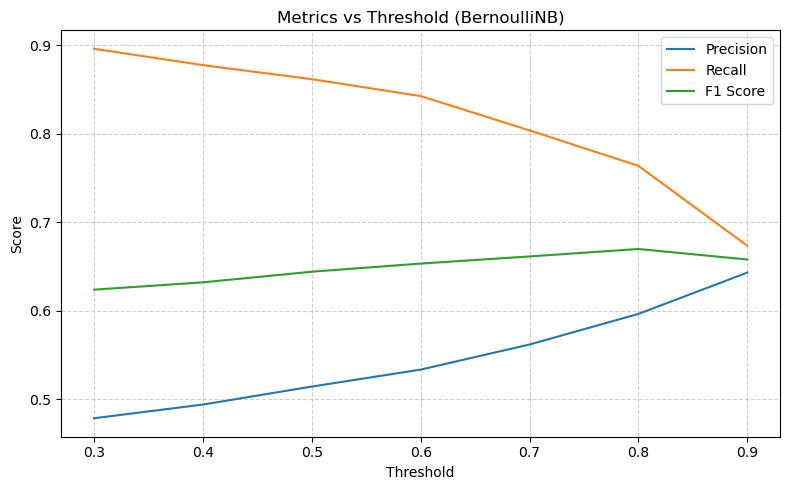

In [10]:
# ---- GridSearchCV for best alpha ----
params_1 = {
    'alpha': [1.0, 0.5, 0.1, 0.01],
}

# Tunable scorer
scorer_1 = make_scorer(f1_score, average='macro')

model_1 = BernoulliNB(fit_prior=False)

grid_search_nb = GridSearchCV(
    model_1,
    params_1,
    scoring=scorer_1,
    cv=5,
    n_jobs=-1
)
grid_search_nb.fit(X_train_nb, y_train_nb)

print("Best Params:", grid_search_nb.best_params_)
print("Best F1 (Macro):", grid_search_nb.best_score_)

# ---- Predict probabilities on test set ----
probs_nb = grid_search_nb.predict_proba(X_test_nb)[:, 1]  # Class 1 probabilities

# ---- Try multiple thresholds ----
thresholds_nb = np.arange(0.3, 0.9, 0.1)
threshold_nb_results = []

for t in thresholds_nb:
    y_pred_nb = (probs_nb >= t).astype(int)
    precision = precision_score(y_test_nb, y_pred_nb)
    recall = recall_score(y_test_nb, y_pred_nb)
    f1 = f1_score(y_test_nb, y_pred_nb)
    threshold_nb_results.append((t, precision, recall, f1)) # append by metric in order

# ---- Convert to DataFrame and print ----
results_df_nb = pd.DataFrame(threshold_nb_results, columns=['threshold', 'precision', 'recall', 'f1'])
print("Threshold Evaluation Results:")
print(results_df_nb)

# ---- Find best threshold by F1 ----
best_row = results_df_nb.loc[results_df_nb["f1"].idxmax()]
print("Best Threshold:", best_row["threshold"])
print(f"Precision: {best_row['precision']:.3f}, Recall: {best_row['recall']:.3f}, F1: {best_row['f1']:.3f}")

# ---- Final prediction & evaluation at best threshold ----
y_pred_nb_best = (probs_nb >= best_row["threshold"]).astype(int)

print("Final Classification Report (Best Threshold):")
print(classification_report(y_test_nb, y_pred_nb_best))

# ---- Confusion Matrix Plot ----
cm = confusion_matrix(y_test_nb, y_pred_nb_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title(f"BernoulliNB Threshold = {best_row['threshold']:.2f}")
plt.show()

# ---- Optional: Plot threshold vs metrics ----
plt.figure(figsize=(8, 5))
plt.plot(results_df_nb["threshold"], results_df_nb["precision"], label="Precision")
plt.plot(results_df_nb["threshold"], results_df_nb["recall"], label="Recall")
plt.plot(results_df_nb["threshold"], results_df_nb["f1"], label="F1 Score")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Metrics vs Threshold (BernoulliNB)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


**Bernoulli NB Summary**
- Precison and recall are trading off. Max F1 score macro reaches 0.67 at threshold 0.8. 
- Precision is 0.60 and recall is 0.76 for class >50k. 
- Precision is 0.92 and recall is 0.84 for class <=50k.

#### 2. Gasssian Naive Bayes

In [11]:
columns_to_keep_gnb = [
    'age',
    'education-num',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'income'
]
income_evaluation_gnb = income_evaluation_clean[columns_to_keep_gnb]
income_evaluation_gnb.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,income
0,39,13,2174,0,40,<=50K
1,50,13,0,0,13,<=50K
2,38,9,0,0,40,<=50K
3,53,7,0,0,40,<=50K
4,28,13,0,0,40,<=50K


In [12]:
X_gnb = income_evaluation_gnb.drop(columns=['income'])
y_gnb = income_evaluation_gnb['income']

In [13]:
scaler = StandardScaler()
X_gnb= scaler.fit_transform(X_gnb)

In [14]:
le = LabelEncoder()
y_encoded_gnb = le.fit_transform(income_evaluation_gnb['income'])

In [15]:
X_train_gnb, X_test_gnb, y_train_gnb, y_test_gnb = train_test_split(X_gnb, y_encoded_gnb, test_size=0.2, random_state=42)

Best Params: {'var_smoothing': 1e-09}
Best F1 (Macro): 0.6474784522800855
Threshold Evaluation Results:
   threshold  precision    recall        f1
0        0.2   0.661458  0.323361  0.434374
1        0.3   0.669749  0.322724  0.435567
2        0.4   0.676944  0.321451  0.435909
3        0.5   0.682065  0.319542  0.435197
4        0.6   0.686464  0.316359  0.433115
5        0.7   0.695225  0.315086  0.433640
6        0.8   0.707914  0.313176  0.434245
Best Threshold: 0.4000000000000001
Precision: 0.677, Recall: 0.321, F1: 0.436
Final Classification Report (Best Threshold):
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      4942
           1       0.68      0.32      0.44      1571

    accuracy                           0.80      6513
   macro avg       0.75      0.64      0.66      6513
weighted avg       0.78      0.80      0.77      6513



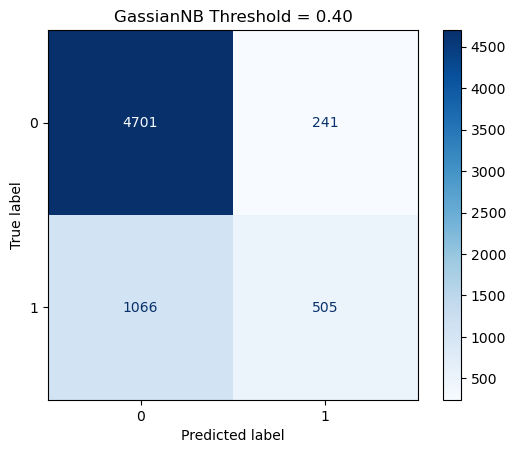

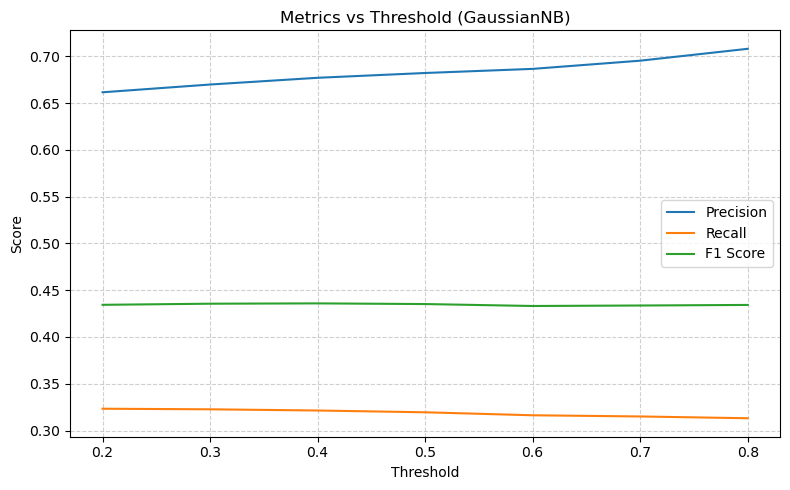

In [16]:
# ---- GridSearchCV for best alpha ----
params_2 = {
    'var_smoothing': np.logspace(-9, -5, 10)
}

# Tunable scorer
scorer_2 = make_scorer(f1_score, average='macro')

model_2 = GaussianNB(priors=None)

grid_search_gnb = GridSearchCV(
    model_2,
    params_2,
    scoring=scorer_2,
    cv=5,
    n_jobs=-1
)
grid_search_gnb.fit(X_train_gnb, y_train_gnb)

print("Best Params:", grid_search_gnb.best_params_)
print("Best F1 (Macro):", grid_search_gnb.best_score_)

# ---- Predict probabilities on test set ----
probs_gnb = grid_search_gnb.predict_proba(X_test_gnb)[:, 1]  # Class 1 probabilities

# ---- Try multiple thresholds ----
thresholds_gnb = np.arange(0.2, 0.9, 0.1)
threshold_gnb_results = []

for t in thresholds_gnb:
    y_pred_gnb = (probs_gnb >= t).astype(int)
    precision = precision_score(y_test_gnb, y_pred_gnb)
    recall = recall_score(y_test_gnb, y_pred_gnb)
    f1 = f1_score(y_test_gnb, y_pred_gnb)
    threshold_gnb_results.append((t, precision, recall, f1)) # append by metric in order

# ---- Convert to DataFrame and print ----
results_df_gnb = pd.DataFrame(threshold_gnb_results, columns=['threshold', 'precision', 'recall', 'f1'])
print("Threshold Evaluation Results:")
print(results_df_gnb)

# ---- Find best threshold by F1 ----
best_row_gnb = results_df_gnb.loc[results_df_gnb["f1"].idxmax()]
print("Best Threshold:", best_row_gnb["threshold"])
print(f"Precision: {best_row_gnb['precision']:.3f}, Recall: {best_row_gnb['recall']:.3f}, F1: {best_row_gnb['f1']:.3f}")

# ---- Final prediction & evaluation at best threshold ----
y_pred_gnb_best = (probs_gnb >= best_row_gnb["threshold"]).astype(int)

print("Final Classification Report (Best Threshold):")
print(classification_report(y_test_gnb, y_pred_gnb_best))

# ---- Confusion Matrix Plot ----
cm = confusion_matrix(y_test_gnb, y_pred_gnb_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title(f"GassianNB Threshold = {best_row_gnb['threshold']:.2f}")
plt.show()

# ---- Optional: Plot threshold vs metrics ----
plt.figure(figsize=(8, 5))
plt.plot(results_df_gnb["threshold"], results_df_gnb["precision"], label="Precision")
plt.plot(results_df_gnb["threshold"], results_df_gnb["recall"], label="Recall")
plt.plot(results_df_gnb["threshold"], results_df_gnb["f1"], label="F1 Score")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Metrics vs Threshold (GaussianNB)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



**Gassian NB Summary**
- This model attempts to use numeric features only to predict the target.
- Metric vs threshold curve is flat meaning the model is not sensitive to change in threshold.
- Precision is 0.68 and recall is 0.32 for class >50k. 
- Precision is 0.82 and recall is 0.95 for class <=50k.
- The model has less ability to find the positive class.

#### 3. MLP

In [17]:
from sklearn.neural_network import MLPClassifier

In [18]:
columns_to_keep_nn = [
    'age',
    'workclass',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'income'
]
income_evaluation_nn = income_evaluation_clean[columns_to_keep_nn]# direclt call columns 
income_evaluation_nn.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [19]:
# Convert categorical features to numerical
categorical_features_nn = income_evaluation_nn.select_dtypes(include=['object']).drop(columns=['income']).columns
income_evaluation_nn = pd.get_dummies(income_evaluation_nn, columns=categorical_features_nn, drop_first=True)

In [20]:
X_nn = income_evaluation_nn.drop(columns=['income'])
y_encoded_nn = le.fit_transform(income_evaluation_nn['income'])

In [21]:
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_nn, y_encoded_nn, test_size=0.2, random_state=42)

Threshold Evaluation Results:
   threshold  precision    recall        f1
0        0.2   0.603290  0.793762  0.685542
1        0.3   0.667276  0.697008  0.681818
2        0.4   0.709480  0.590707  0.644668
3        0.5   0.740402  0.515595  0.607880
4        0.6   0.753706  0.420751  0.540033
5        0.7   0.745242  0.323997  0.451642
6        0.8   0.752475  0.290261  0.418925
Best Threshold: 0.2
Precision: 0.603, Recall: 0.794, F1: 0.686
Final Classification Report (Best Threshold):
              precision    recall  f1-score   support

       <=50K       0.93      0.83      0.88      4942
        >50K       0.60      0.79      0.69      1571

    accuracy                           0.82      6513
   macro avg       0.77      0.81      0.78      6513
weighted avg       0.85      0.82      0.83      6513



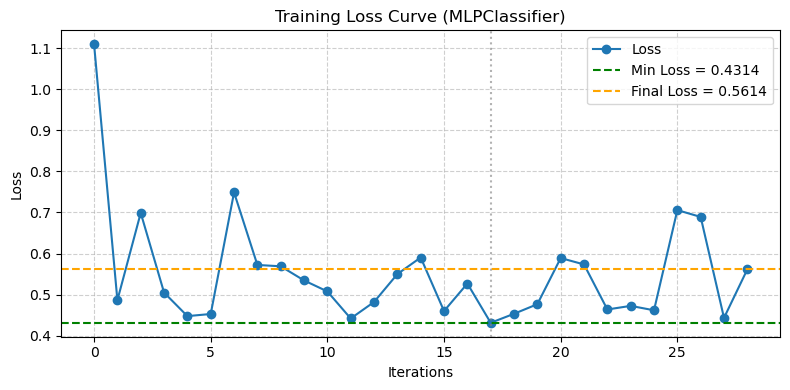

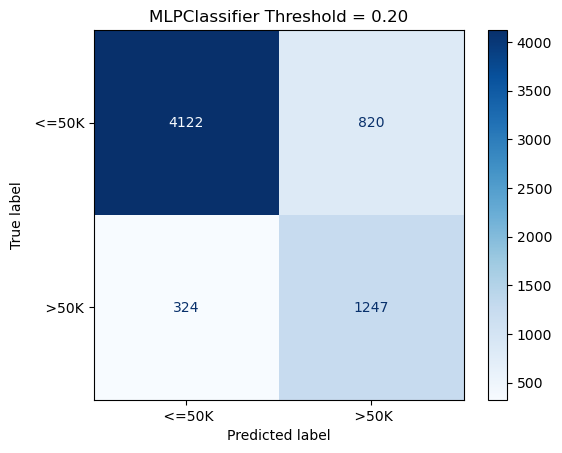

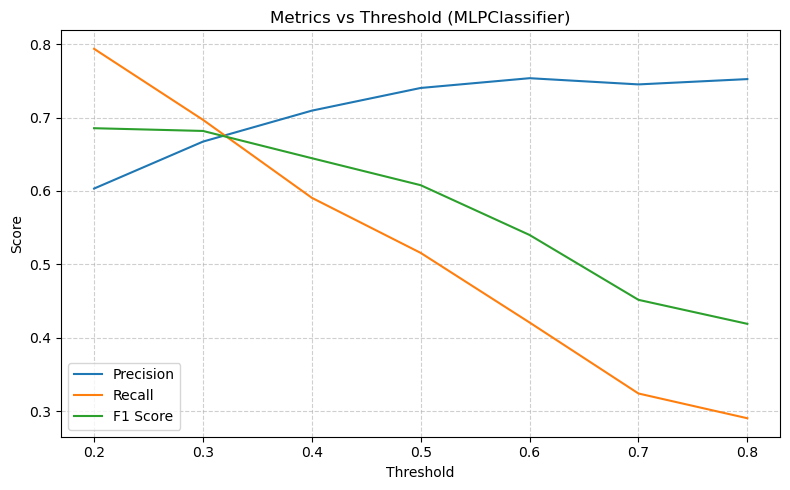

In [30]:
# Model training
model_mlp = MLPClassifier(
    hidden_layer_sizes=(128),
    learning_rate_init=0.001,
    learning_rate='adaptive',
    max_iter=300,
    random_state=42)
model_mlp.fit(X_train_nn, y_train_nn)
probs_mlp = model_mlp.predict_proba(X_test_nn)[:, 1]

thresholds_mlp = np.arange(0.2, 0.9, 0.1)
threshold_mlp_results = []
for t in thresholds_mlp:
    y_pred_mlp = (probs_mlp >= t).astype(int)
    precision = precision_score(y_test_nn, y_pred_mlp)
    recall = recall_score(y_test_nn, y_pred_mlp)
    f1 = f1_score(y_test_nn, y_pred_mlp)
    threshold_mlp_results.append((t, precision, recall, f1)) # append by metric in order

# ---- Convert to DataFrame and print ----
results_df_mlp = pd.DataFrame(threshold_mlp_results, columns=['threshold', 'precision', 'recall', 'f1'])
print("Threshold Evaluation Results:")
print(results_df_mlp)

# Find best threshold by F1
best_row_mlp = results_df_mlp.loc[results_df_mlp["f1"].idxmax()]
print("Best Threshold:", best_row_mlp["threshold"])
print(f"Precision: {best_row_mlp['precision']:.3f}, Recall: {best_row_mlp['recall']:.3f}, F1: {best_row_mlp['f1']:.3f}")

# Final prediction & evaluation at best threshold
y_pred_mlp_best = (probs_mlp >= best_row_mlp["threshold"]).astype(int)
print("Final Classification Report (Best Threshold):")
print(classification_report(y_test_nn, y_pred_mlp_best, target_names=label_encoder.classes_))

# Loss curve
plt.figure(figsize=(8, 4))
plt.plot(model_mlp.loss_curve_, marker='o', label ='Loss')
plt.title("Training Loss Curve (MLPClassifier)")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True, linestyle='--', alpha=0.6)
min_idx = np.argmin(model_mlp.loss_curve_)
min_loss = model_mlp.loss_curve_[min_idx]
final_loss = model_mlp.loss_curve_[-1]
plt.axhline(min_loss, color='green', linestyle='--', label=f"Min Loss = {min_loss:.4f}")
plt.axhline(final_loss, color='orange', linestyle='--', label=f"Final Loss = {final_loss:.4f}")
plt.axvline(min_idx, color='gray', linestyle=':', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()
# CM
cm = confusion_matrix(y_test_nn, y_pred_mlp_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.title(f"MLPClassifier Threshold = {best_row_mlp['threshold']:.2f}")
plt.show()
# Score vs threshold
plt.figure(figsize=(8, 5))
plt.plot(results_df_mlp["threshold"], results_df_mlp["precision"], label="Precision")
plt.plot(results_df_mlp["threshold"], results_df_mlp["recall"], label="Recall")
plt.plot(results_df_mlp["threshold"], results_df_mlp["f1"], label="F1 Score")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Metrics vs Threshold (MLPClassifier)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**MLP Summary**

- This model uses both numeric and categorical features with preprocessing to predict the target.

- In Metric vs threshold curve,  f1 score macro is maximized at threshold 0.2.

- Precision is 0.60 and recall is 0.79 for class >50K at the best threshold (0.2).

- Precision is 0.93 and recall is 0.83 for class <=50K at the best threshold.

- Compared to Gaussian NB, the MLP model finds the positive class (>50K) much better, with a higher recall but a moderate drop in precision.

#### 4. Random Forest

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best RF Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 100}
Threshold Evaluation Results:
   threshold  precision    recall        f1
0        0.2   0.396304  0.982813  0.564844
1        0.3   0.441772  0.958625  0.604819
2        0.4   0.479605  0.928071  0.632401
3        0.5   0.551272  0.882877  0.678737
4        0.6   0.646748  0.778485  0.706528
5        0.7   0.785095  0.576703  0.664954
6        0.8   0.875342  0.406747  0.555411
Best Threshold: 0.6000000000000001
Precision: 0.647, Recall: 0.778, F1: 0.707
Final Classification Report (Best Threshold):
              precision    recall  f1-score   support

       <=50K       0.92      0.86      0.89      4942
        >50K       0.65      0.78      0.71      1571

    accuracy                           0.84      6513
   macro avg       0.79      0.82      0.80      6513
weighted avg       0.86      0.84      0.85      6513



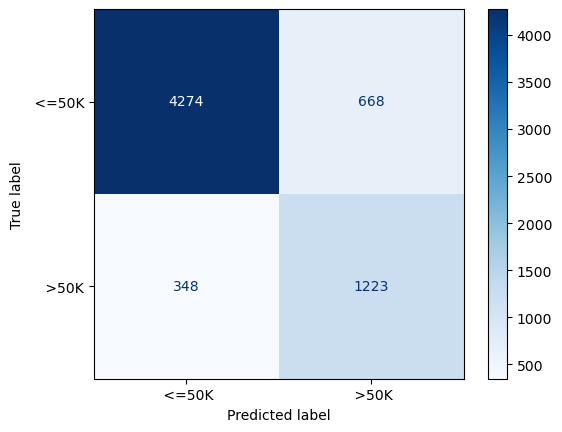

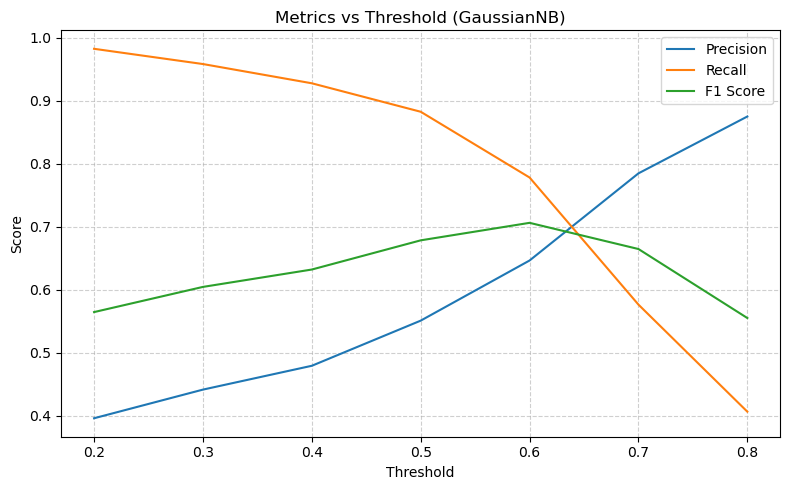

In [33]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=42, 
                                         n_jobs=-1,
                                          class_weight='balanced')


# Reduced grid
param_grid_rf = {
    'n_estimators': [100],
    'max_depth': [10],
    'min_samples_leaf': [1, 2]
}

# Lighter grid search
grid_search_rf = GridSearchCV(
    model_rf,
    param_grid_rf,
    cv=3,
    scoring='precision',
    n_jobs=-1,
    verbose=1
)

grid_search_rf.fit(X_train_nn, y_train_nn)

best_rf = grid_search_rf.best_estimator_
print("Best RF Parameters:", grid_search_rf.best_params_)

# Predict & evaluate
probs_rf = best_rf.predict_proba(X_test_nn)[:, 1]



thresholds_rf = np.arange(0.2, 0.9, 0.1)
threshold_rf_results = []
for t in thresholds_rf:
    y_pred_rf = (probs_rf >= t).astype(int)
    precision = precision_score(y_test_nn, y_pred_rf)
    recall = recall_score(y_test_nn, y_pred_rf)
    f1 = f1_score(y_test_nn, y_pred_rf)
    threshold_rf_results.append((t, precision, recall, f1)) # append by metric in order

# ---- Convert to DataFrame and print ----
results_df_rf = pd.DataFrame(threshold_rf_results, columns=['threshold', 'precision', 'recall', 'f1'])
print("Threshold Evaluation Results:")
print(results_df_rf)

# Find best threshold by F1
best_row_rf = results_df_rf.loc[results_df_rf["f1"].idxmax()]
print("Best Threshold:", best_row_rf["threshold"])
print(f"Precision: {best_row_rf['precision']:.3f}, Recall: {best_row_rf['recall']:.3f}, F1: {best_row_rf['f1']:.3f}")

# Final prediction & evaluation at best threshold
y_pred_rf_best = (probs_rf >= best_row_rf["threshold"]).astype(int)
print("Final Classification Report (Best Threshold):")
print(classification_report(y_test_nn, y_pred_rf_best, target_names=label_encoder.classes_))


cm_rf = confusion_matrix(y_test_nn, y_pred_rf_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')

plt.figure(figsize=(8, 5))
plt.plot(results_df_rf["threshold"], results_df_rf["precision"], label="Precision")
plt.plot(results_df_rf["threshold"], results_df_rf["recall"], label="Recall")
plt.plot(results_df_rf["threshold"], results_df_rf["f1"], label="F1 Score")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Metrics vs Threshold (GaussianNB)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


**Random Forest Summary**

- This model uses both numeric and categorical features with preprocessing, and fine-tuned hyperparameters.

- Metric vs threshold curve shows noticeable changes with max f1 at threshold 0.6.

- Precision is 0.65 and recall is 0.78 for class >50K.

- Precision is 0.92 and recall is 0.86 for class <=50K

- The model achieves a better balance between precision and recall for the positive class compared to MLP and Gaussian NB, leading to a stronger overall performance.

**Model Comparison Summary**

- **Bernoulli NB** achieves a reasonable balance between precision and recall for both classes, with a macro F1 score peaking at 0.67. However, recall for the positive class (>50K) is lower compared to more advanced models, indicating a tendency to miss some positive cases.

- **Gaussian NB** struggles to capture the positive class (>50K), achieving only 0.32 recall despite decent precision. Its flat metric vs threshold curve shows that threshold adjustment has little effect. This model is less suited for scenarios requiring accurate detection of the positive class.

- **MLP** improves recall for the positive class to 0.79 while maintaining reasonable precision. It is more sensitive to threshold tuning, with the best F1 score achieved at a low threshold (0.2). Compared to both Bernoulli NB and Gaussian NB, MLP demonstrates better capability to detect high-income individuals, although with slightly lower precision than Random Forest.

- **Random Forest** provides the best overall balance among the four models. It achieves strong precision (0.65) and recall (0.78) for the positive class at the best threshold (0.6). Additionally, its precision and recall for the negative class (<=50K) remain high. The Random Forest model outperforms others by offering a more robust trade-off between identifying positive cases and avoiding false positives.
- In conclusion, while all models have their strengths and weaknesses, Random Forest stands out as the most effective for this classification task, particularly in terms of its ability to balance precision and recall across both classes. MLP also shows promise, especially in detecting the positive class, but with a slight trade-off in precision.
